In [2]:
#importing packages
import numpy as np
import pandas as pd

In [3]:
#load dataset
dataset = pd.read_csv('C:/Users/Abarna V/Desktop/BML LAB/Data.csv')

In [4]:
dataset.head(10)


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
#Create independent and dependent variable vectors
x = dataset.iloc[:,:-1].values #Independent variable data
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [6]:
#Dependent variable data
y = dataset.iloc[:,3].values 
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [7]:
#handling missing data 
#count the number of missing valies in each column
print(dataset.isnull().sum())

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [8]:
#drop missing value records
dataset.dropna(inplace = True)
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [9]:
#Replace the missing values
# Taking care of missing data (replacing with the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Fitting the imputer object to the matrix of features X
imputer.fit(x[:,1:3])

# Replacing the missing data by the mean of the column
x[:,1:3] = imputer.transform(x[:,1:3])
print(x[:,1:3])


[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


In [10]:
# Encoding Categorical Data
#OneHotEncoding 
#Dummy Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])],remainder = "passthrough")
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [12]:
#split the training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
print(x_train)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]


In [14]:
print(y_train)

[1 0 0 1 1 0 1]


In [15]:
print(y_test)

[0 1 0]


In [16]:
#Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
x_train[:,2:]=scaler.fit_transform(x_train[:,2:])
x_test[:,2:]=scaler.fit_transform(x_test[:,2:])
print(x_train)
print(x_test)

[[0.0 1.0 -0.6324555320336758 -0.038910211282047996 -0.22960023388015188]
 [1.0 0.0 -0.6324555320336758 0.5058327466666259 0.49120534884662787]
 [0.0 0.0 1.5811388300841895 -0.3112816902563849 -0.4731156334500103]
 [0.0 0.0 1.5811388300841895 -1.809324824615238 -1.6127677034369463]
 [1.0 0.0 -0.6324555320336758 1.0505757046152997 1.1048641557626704]
 [0.0 1.0 -0.6324555320336758 1.3229471835896367 1.455526331143266]
 [1.0 0.0 -0.6324555320336758 -0.7198389087178904 -0.736112264985457]]
[[0.0 1.0 -0.7071067811865475 -1.3880272079128577 -0.5513801778287937]
 [1.0 0.0 -0.7071067811865475 0.4594174561401711 1.40351317992784]
 [0.0 0.0 1.4142135623730951 0.9286097517726866 -0.8521330020990451]]


In [18]:
#Find outliers and remove outliers
import matplotlib.pyplot as plt

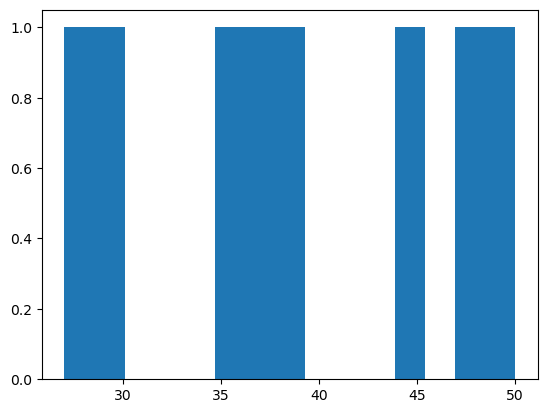

In [19]:
plt.hist(dataset['Age'], bins=15)
plt.show()

In [20]:
#using Quantile method, find the outliers 
lowerLimit=dataset['Age'].quantile(0.05)
print(lowerLimit)

28.05


In [21]:
print(dataset[dataset['Age']<lowerLimit])


  Country   Age   Salary Purchased
1   Spain  27.0  48000.0       Yes


In [22]:
upperLimit=dataset['Age'].quantile(0.95)
print(upperLimit)

49.3


In [23]:
print(dataset[dataset['Age']>upperLimit])


   Country   Age   Salary Purchased
8  Germany  50.0  83000.0        No


In [24]:
#Removing the outliers
dataset = dataset[(dataset['Age']>lowerLimit) & (dataset['Age']<upperLimit)]
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
9   France  37.0  67000.0       Yes
